In [ ]:
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          3                           
minor          6.3                         
year           2020                        
month          02                          
day            29                          
svn rev        77875                       
language       R                           
version.string R version 3.6.3 (2020-02-29)
nickname       Holding the Windsock        

In [15]:
df<-read.csv("binary.csv")

In [17]:
str(df)

'data.frame':	400 obs. of  4 variables:
 $ admit: int  0 1 1 1 0 1 1 0 1 0 ...
 $ gre  : int  380 660 800 640 520 760 560 400 540 700 ...
 $ gpa  : num  3.61 3.67 4 3.19 2.93 3 2.98 3.08 3.39 3.92 ...
 $ rank : int  3 3 1 4 4 2 1 2 3 2 ...


In [18]:
head(df)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
5,0,520,2.93,4
6,1,760,3.00,2


In [19]:
tail(df)

#The head function prints the first 6 values. The tail fn prints the last 6 values.

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
395,1,460,3.99,3
396,0,620,4.00,2
397,0,560,3.04,3
398,0,460,2.63,2
399,0,700,3.65,2
400,0,600,3.89,3


In [20]:
summary(df)  # Formulating the summary of the dataset

     admit             gre             gpa             rank      
 Min.   :0.0000   Min.   :220.0   Min.   :2.260   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:520.0   1st Qu.:3.130   1st Qu.:2.000  
 Median :0.0000   Median :580.0   Median :3.395   Median :2.000  
 Mean   :0.3175   Mean   :587.7   Mean   :3.390   Mean   :2.485  
 3rd Qu.:1.0000   3rd Qu.:660.0   3rd Qu.:3.670   3rd Qu.:3.000  
 Max.   :1.0000   Max.   :800.0   Max.   :4.000   Max.   :4.000  

In [21]:
table(df$admit)


  0   1 
273 127 

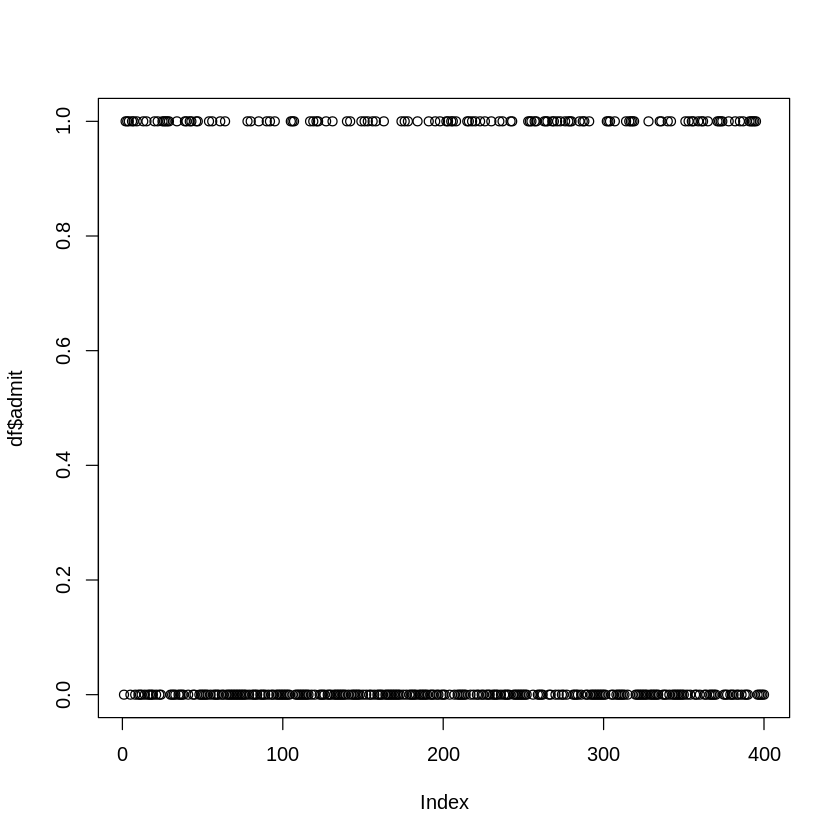

In [23]:
plot(df$admit)

In [24]:
library(ggplot2)

In [25]:
df$admit = as.factor(df$admit)

#This is the data preprocessing step

In [26]:
df$rank = as.factor(df$rank)

In [70]:
str(df) #recheck the data set after changing rhe data type : int to factor

'data.frame':	400 obs. of  4 variables:
 $ admit: Factor w/ 2 levels "0","1": 1 2 2 2 1 2 2 1 2 1 ...
 $ gre  : int  380 660 800 640 520 760 560 400 540 700 ...
 $ gpa  : num  3.61 3.67 4 3.19 2.93 3 2.98 3.08 3.39 3.92 ...
 $ rank : Factor w/ 4 levels "1","2","3","4": 3 3 1 4 4 2 1 2 3 2 ...


In [28]:
xtabs(~admit+ rank, data=df)

#concept of cross tabs, to find if there is any null value

     rank
admit  1  2  3  4
    0 28 97 93 55
    1 33 54 28 12

In [29]:
set.seed(1234)

#now, we will partition the data into 80 -20. 
#80 is the train data and 20 is the test data. we test 20% and predict the rest 80

In [32]:
ind = sample(2, nrow(df), replace=TRUE, prob=c(0.80, 0.20))

In [34]:
train = df[ind==1, ]

In [35]:
test = df[ind==2, ]

In [36]:
str(train)

'data.frame':	325 obs. of  4 variables:
 $ admit: Factor w/ 2 levels "0","1": 1 2 2 2 2 2 1 2 1 1 ...
 $ gre  : int  380 660 800 640 760 560 400 540 700 800 ...
 $ gpa  : num  3.61 3.67 4 3.19 3 2.98 3.08 3.39 3.92 4 ...
 $ rank : Factor w/ 4 levels "1","2","3","4": 3 3 1 4 2 1 2 3 2 4 ...


In [37]:
str(test)

'data.frame':	75 obs. of  4 variables:
 $ admit: Factor w/ 2 levels "0","1": 1 1 1 2 2 2 2 2 1 2 ...
 $ gre  : int  520 700 480 800 520 780 500 520 600 620 ...
 $ gpa  : num  2.93 3.08 3.44 3.66 3.74 3.22 3.13 2.68 2.82 3.18 ...
 $ rank : Factor w/ 4 levels "1","2","3","4": 4 2 3 1 4 2 2 3 4 2 ...


In [38]:
head(train)

,admit,gre,gpa,rank
,<fct>,<int>,<dbl>,<fct>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
6,1,760,3.00,2
7,1,560,2.98,1


In [39]:
head(test)

,admit,gre,gpa,rank
,<fct>,<int>,<dbl>,<fct>
5,0,520,2.93,4
14,0,700,3.08,2
16,0,480,3.44,3
26,1,800,3.66,1
28,1,520,3.74,4
29,1,780,3.22,2


In [40]:
head(ind)

[1] 1 1 1 1 2 1

In [41]:
#we have now partitioned the data usuimng sample fn
#Now, we will build a model

clf = glm(admit~ gre+gpa+rank, data= train, family= 'binomial')

In [42]:
summary(clf)


Call:
glm(formula = admit ~ gre + gpa + rank, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5873  -0.8679  -0.6181   1.1301   2.1178  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.009514   1.316514  -3.805 0.000142 ***
gre          0.001631   0.001217   1.340 0.180180    
gpa          1.166408   0.388899   2.999 0.002706 ** 
rank2       -0.570976   0.358273  -1.594 0.111005    
rank3       -1.125341   0.383372  -2.935 0.003331 ** 
rank4       -1.532942   0.477377  -3.211 0.001322 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 404.39  on 324  degrees of freedom
Residual deviance: 369.99  on 319  degrees of freedom
AIC: 381.99

Number of Fisher Scoring iterations: 4


In [43]:
coefficients(clf)  #y = mx+c and MLR:

(Intercept)          gre          gpa        rank2        rank3        rank4 
-5.009514038  0.001631284  1.166408495 -0.570976207 -1.125340854 -1.532942235

In [44]:
pred = predict(clf, test, type = 'response')

In [45]:
pred

5         14         16         26         28         29         39 
0.09307860 0.30026148 0.20760987 0.63750895 0.20885837 0.36534183 0.24712788 
        40         60         61         72         81         86         90 
0.10334370 0.09326429 0.29735712 0.06616438 0.11732879 0.22160716 0.54035985 
        92        113        116        117        122        123        124 
0.60126473 0.11421749 0.38473727 0.30182639 0.15667708 0.12321589 0.13665966 
       131        135        137        140        142        149        154 
0.29492585 0.22687072 0.14870468 0.53618637 0.21504158 0.30316978 0.23995312 
       156        158        169        185        187        192        194 
0.09445760 0.48731394 0.34218353 0.07780619 0.26686225 0.33164789 0.14992853 
       195        196        197        199        210        216        220 
0.36487149 0.38235497 0.18583057 0.28454619 0.36542009 0.15923133 0.38235497 
       227        234        240        245        249        261        277 
0.40291075 0.08823289 0.27511047 0.35830267 0.31435122 0.30075894 0.27148446 
       283        290        293        302        305        308        311 
0.19128234 0.03837444 0.46120179 0.29751976 0.07762686 0.36812908 0.36454259 
       320        322        330        332        333        339        341 
0.42487299 0.34200836 0.09036082 0.29508772 0.29487876 0.40224652 0.12354124 
       344        349        355        356        365        366        369 
0.25632931 0.26720615 0.42786370 0.37939191 0.45589933 0.10820364 0.64617430 
       371        373        389        390        396 
0.42501080 0.25397332 0.30175527 0.39117533 0.52411628

In [46]:
head(pred)

5        14        16        26        28        29 
0.0930786 0.3002615 0.2076099 0.6375090 0.2088584 0.3653418

In [47]:
head(test)

,admit,gre,gpa,rank
,<fct>,<int>,<dbl>,<fct>
5,0,520,2.93,4
14,0,700,3.08,2
16,0,480,3.44,3
26,1,800,3.66,1
28,1,520,3.74,4
29,1,780,3.22,2


In [49]:
pred2 = ifelse(pred>0.5, 1, 0) 
# here we are finding missclassification as the model is not showing what we predicted
#how to evaluate the model performance, accuracy and missclassification.

In [50]:
head(pred2)

5 14 16 26 28 29 
 0  0  0  1  0  0

In [51]:
tab1 = table(Predicted = pred2, Actual = test$admit)

In [52]:
tab1

         Actual
Predicted  0  1
        0 48 21
        1  2  4

In [53]:
accuracy = (sum(diag(tab1))/sum(tab1))*100

In [54]:
accuracy  #accuracy in %

[1] 69.33333

In [55]:
100 - accuracy #% of missclassification

[1] 30.66667

In [56]:
clf2 = glm(admit~ gpa+ rank, data = train, family= 'binomial') #how to improve accuracy

In [57]:
summary(clf2)


Call:
glm(formula = admit ~ gpa + rank, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5156  -0.8880  -0.6318   1.1091   2.1688  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -4.7270     1.2918  -3.659 0.000253 ***
gpa           1.3735     0.3590   3.826 0.000130 ***
rank2        -0.5712     0.3564  -1.603 0.108976    
rank3        -1.1645     0.3804  -3.061 0.002203 ** 
rank4        -1.5642     0.4756  -3.289 0.001005 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 404.39  on 324  degrees of freedom
Residual deviance: 371.81  on 320  degrees of freedom
AIC: 381.81

Number of Fisher Scoring iterations: 4


In [58]:
predclf2 = predict(clf2, test, type='response')

In [59]:
head(predclf2)

5         14         16         26         28         29 
0.09390783 0.25582628 0.23746963 0.57446309 0.23971008 0.29411490

In [60]:
head(test$admit)

[1] 0 0 0 1 1 1
Levels: 0 1

In [61]:
p3 = ifelse(predclf2>0.5, 1, 0) 

In [62]:
tab2 = table(Predicted = p3, Actual = test$admit) #here we have redefined the classifcation

In [63]:
tab2 

         Actual
Predicted  0  1
        0 48 20
        1  2  5

In [65]:
accuracy2 = (sum(diag(tab2))/sum(tab2))*100

In [66]:
accuracy2 #accuracy in % after we refined the criteria to classify data in p3

[1] 70.66667

In [68]:
Missclassification = 100-accuracy2 
#we can see, accuracy has increased
#Missclassification is 100- Accuracy.

In [69]:
Missclassification

[1] 29.33333